In [22]:
# WFLWのアノテーションデータの読み込み
annotation_data_path = "/root/dataset/WFLW/WFLW_annotations/list_98pt_rect_attr_train_test/list_98pt_rect_attr_train.txt"

with open(annotation_data_path) as f:
    # anotation_data = f.read()
    anotation_data = f.readlines()
    # print(anotation_data)
# print(type(anotation_data))
# print(anotation_data)

anotation_data_lists = []
for i in anotation_data:
    anotation_data_lists.append(i.split(" "))

In [ ]:
# pose expression illumination make-up occlusion blur
for i in range(0,20):
    print(i)
    print(anotation_data_lists[i][200:206])

# make-up

bounding_box_data (586, 73, 746, 317)
[-6.997009 -6.31793  -5.603315 -4.81907  -3.905193 -2.617091 -0.6252
  2.420252  6.865761 12.939953]
[ 94.764008 106.841323 118.916578 130.987499 143.049139 155.075746
 167.004224 178.705177 189.944478 200.391388]
画像サイズ： (160, 244)


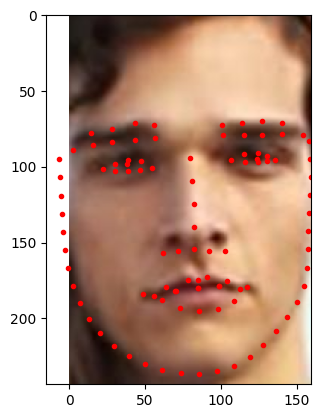

In [49]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_num = 1
WFLW_images = "/root/dataset/WFLW/WFLW_images"
image_path = WFLW_images + "/" + anotation_data_lists[image_num][-1].replace("\n","")
bounding_box_data = tuple([int(bdbox) for bdbox in anotation_data_lists[image_num][-11:-7]])
# クロップ画像に対する絶対位置のランドマーク座標データ
orig_keypoints_x = [float(keypoint) - bounding_box_data[0]   for keypoint in anotation_data_lists[image_num][0:196:2]]
orig_keypoints_y = [float(keypoint) - bounding_box_data[1]  for keypoint in anotation_data_lists[image_num][1:196:2]]

print("bounding_box_data",bounding_box_data)
x_np = np.array(orig_keypoints_x)
y_np = np.array(orig_keypoints_y)
print(x_np[0:10])
print(y_np[0:10])

fig,ax = plt.subplots(1)
image = Image.open(image_path)

image = image.crop(bounding_box_data)
crop_res_size_x , crop_res_size_y= image.size
print("画像サイズ：",image.size)
ax.imshow(image)
plt.plot(x_np, y_np, 'o',color='red',markersize=3)  # 点と点を線でつなぐプロットを作成
plt.show()

image_path /root/dataset/WFLW/WFLW_images/19--Couple/19_Couple_Couple_19_340.jpg
666.0 195.0
crop_size_tuple (505.2, -7.800000000000011, 826.8, 397.8)
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1486 at 0x7F93638DFBB0>


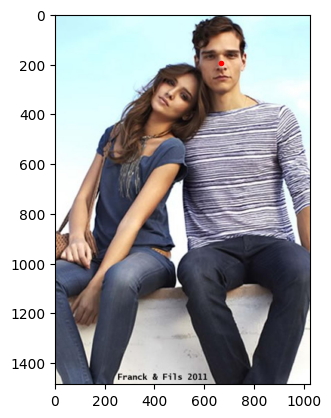

In [68]:
# txt2img with ControlNet (used 1.0 but also supports 1.1)
import cv2
import base64
from PIL import Image
import webuiapi

prompt = "1girl,face,beautiful,masterpiece,anime"
negative_prompt = "lowres, (worst quality:1.5), (low quality:1.5), normal quality, text, watermark"
fig, ax = plt.subplots(1)

WFLW_images = "/root/dataset/WFLW/WFLW_images"
image_path = WFLW_images + "/" + anotation_data_lists[image_num][-1].replace("\n","")
print("image_path",image_path)
api = webuiapi.WebUIApi(host='10.8.76.222', port=7860)

# Encode into PNG and send to ControlNet
# retval, bytes = cv2.imencode('.png', img)

# numpy_imageはnumpy.ndarray型の画像データを示します

image = Image.open(image_path)


image_yohaku = float((crop_res_size_x+crop_res_size_y) / 2 * 0.4)

face_center_point_x = (bounding_box_data[2] + bounding_box_data[0]) / 2
face_center_point_y = (bounding_box_data[3] + bounding_box_data[1]) / 2
print(face_center_point_x,face_center_point_y)

# if bounding_box_data[2] - bounding_box_data[0] > bounding_box_data[3] - bounding_box_data[1]:
#     bounding_box_data[0]
crop_coordinate_tuple = (bounding_box_data[0] - image_yohaku, bounding_box_data[1] - image_yohaku, bounding_box_data[2] + image_yohaku, bounding_box_data[3] + image_yohaku)
print("crop_size_tuple",crop_coordinate_tuple)

# control_image = image.crop(crop_coordinate_tuple)
# print("control_image.size",control_image.size)
# x , y = control_image.size
ax.imshow(image)
print(image)
plt.plot(face_center_point_x, face_center_point_y, 'o',color='red',markersize=3)  # 点と点を線でつなぐプロットを作成
plt.show()
# unit1 = webuiapi.ControlNetUnit(input_image=control_image, module='openpose_faceonly', model='control_v11p_sd15_openpose [cab727d4]',weight=2)

# r = api.txt2img(prompt=prompt,negative_prompt=negative_prompt,width=x, height=y,steps=30,controlnet_units=[unit1])
# r = api.txt2img(prompt=prompt,negative_prompt=negative_prompt,width=512, height=512,steps=30,controlnet_units=[unit1])
# print("出力画像サイズ",r.image.size)
# r.image


In [57]:
(512 / x)

1.5900621118012421

322 406
[-6.997009000000048, -6.317930000000047, -5.603314999999952, -4.819070000000011, -3.905193000000054, -2.6170909999999594, -0.6251999999999498, 2.420252000000005, 6.86576100000002, 12.939952999999946]
[94.76400799999999, 106.84132299999999, 118.91657799999999, 130.987499, 143.049139, 155.075746, 167.004224, 178.705177, 189.944478, 200.391388]
[117.35133973 118.43111752 119.56739975 120.81439801 122.2675192
 124.31568139 127.4829118  132.32536964 139.39400507 149.05234763]
[221.40091649 236.63142211 251.85932989 267.08177214 282.29251027
 297.45906885 312.50187854 327.25776016 341.43145994 354.60588832]


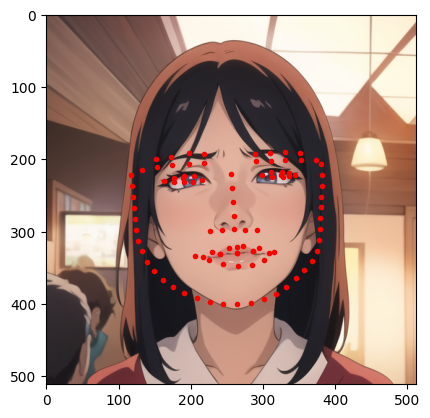

In [59]:
# orig_keypoints_x = [float(keypoint) - bounding_box_data[0]   for keypoint in anotation_data_lists[image_num][0:196:2]]
# orig_keypoints_y = [float(keypoint) - bounding_box_data[1]  for keypoint in anotation_data_lists[image_num][1:196:2]]
print(x,y)
print(orig_keypoints_x[0:10])
print(orig_keypoints_y[0:10])
genimage_keypoints_x = [float(keypoint_x + image_yohaku) * (512 / x) for keypoint_x in orig_keypoints_x]
genimage_keypoints_y = [float(keypoint_y + image_yohaku) * (512 / y) for keypoint_y in orig_keypoints_y]
# genimage_keypoints_x = [float(keypoint + image_yohaku) for keypoint in orig_keypoints_x]
# genimage_keypoints_y = [float(keypoint + image_yohaku) for keypoint in orig_keypoints_y]
x_np = np.array(genimage_keypoints_x)
y_np = np.array(genimage_keypoints_y)
print(x_np[0:10])
print(y_np[0:10])

fig,ax = plt.subplots(1)
# image = Image.open(r.image)
# image = image.crop((306, 308, 696, 870))
ax.imshow(r.image)
# ax.imshow(control_image)
plt.plot(x_np, y_np, 'o',color='red',markersize=3)  # 点と点を線でつなぐプロットを作成
plt.show()

In [ ]:
# WFLW_images = "/root/dataset/WFLW/WFLW_images"
# image_path = WFLW_images + "/" + anotation_data_lists[0][-1].replace("\n","")}
keypoints_x = [float(keypoint) - bounding_box_data[0] + image_yohaku  for keypoint in anotation_data_lists[image_num][0:196:2]]
keypoints_y = [float(keypoint) - bounding_box_data[1] + image_yohaku for keypoint in anotation_data_lists[image_num][1:196:2]]
x_np = np.array(keypoints_x)
y_np = np.array(keypoints_y)
print(x_np[0:10])
print(y_np[0:10])

fig,ax = plt.subplots(1)
# image = Image.open(r.image)
# image = image.crop((306, 308, 696, 870))
ax.imshow(r.image)
plt.plot(x_np, y_np, 'o',color='red',markersize=3)  # 点と点を線でつなぐプロットを作成
plt.show()


In [ ]:
r = api.controlnet_detect(images=[control_image], module='openpose_faceonly')
r.image